In [66]:
import tensorflow as tf
import numpy as np
import pandas as pd
#visualization
import seaborn as sns 
import metaplot as plot
import matplotlib.pyplot as plt
data = pd.read_csv("../data/CELSIUS_TO_FAHRENHEIT.csv")

In [43]:
print("MSES")

MSES


In [3]:
print("MSES")

MSES


In [67]:
data.head
data

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0
...,...,...
15995,833,1531.4
15996,757,1394.6
15997,1584,2883.2
15998,2396,4344.8


In [8]:
tf.__version__

'2.17.0'

In [11]:
data.tail(20)

,Celsius,Fahrenheit
15980,1428,2602.4
15981,2122,3851.6
15982,941,1725.8
15983,1559,2838.2
15984,1480,2696.0
15985,613,1135.4
15986,2141,3885.8
15987,1114,2037.2
15988,1753,3187.4
15989,163,325.4


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     16000 non-null  int64  
 1   Fahrenheit  16000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 250.1 KB


In [13]:
data.describe()

,Celsius,Fahrenheit
count,16000.000000,16000.000000
mean,1254.736062,2290.524912
std,726.338268,1307.408882
min,0.000000,32.000000
25%,627.750000,1161.950000
50%,1265.000000,2309.000000
75%,1891.000000,3435.800000
max,2500.000000,4532.000000


<AxesSubplot: xlabel='Celsius', ylabel='Fahrenheit'>

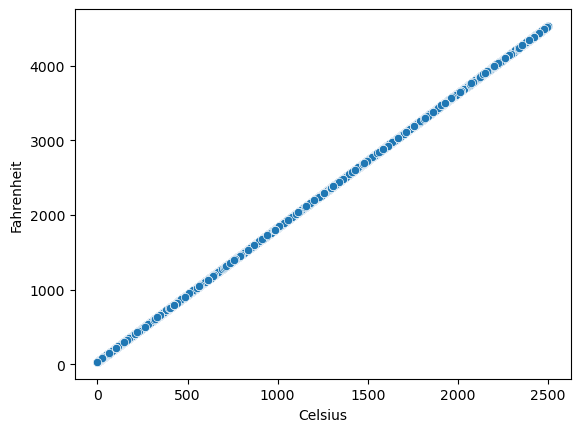

In [19]:
#visuliazação de dados
sns.scatterplot(x =data['Celsius'] , y=data['Fahrenheit'])

In [20]:
#configuração da base de treinamento
ytrain = data['Fahrenheit']
xtrain = data['Celsius']

In [23]:
ytrain.shape

(16000,)

In [24]:
xtrain.shape

(16000,)

In [28]:
model = tf.keras.Sequential()
#input_shape represent the input
#units represents the output
model.add(tf.keras.layers.Dense(units=1 , input_shape = [1]))
model.summary()
#this Param equivalent to baias and Wn..


/home/jsn/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:


model.compile(tf.keras.optimizers.Adam(0.1) , loss= 'mean_squared_error')

In [61]:
#epochs  reference to numbers of time to each trainning
numberTrainning = model.fit(xtrain, ytrain, epochs=1000)

Epoch 1/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 1180.4241
Epoch 2/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.0010
Epoch 3/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.2806 
Epoch 4/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 1181.6100
Epoch 5/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 4537.8589
Epoch 6/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.0140
Epoch 7/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 439.9553
Epoch 8/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 27.2928
Epoch 9/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.0127
Epoch 10/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 0.0014    
Epoch 11/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 5173.8184
Epoch 12/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.0175
Epoch 13/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 7.9650e-04
Epoch 14/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 496

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - loss: 3143.5454
Epoch 78/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.0021    
Epoch 79/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 812.8518
Epoch 80/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 166.6331
Epoch 81/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 4746.1724
Epoch 82/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 1.7670e-05
Epoch 83/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 575.5535
Epoch 84/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.9392
Epoch 85/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 656.4088
Epoch 86/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 1.3610
Epoch 87/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.0012
Epoch 88/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 183.7339
Epoch 89/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 218.9004
Epoch 90/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 67.5054   
Epoch 153/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 512.4662
Epoch 154/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 436.4041
Epoch 155/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.3136
Epoch 156/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 478.0273
Epoch 157/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 6.9265
Epoch 158/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 0.0029
Epoch 159/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 787.4202
Epoch 160/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 6.2295
Epoch 161/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 1500.7416
Epoch 162/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 9.6791e-06
Epoch 163/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 592.0131
Epoch 164/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 634.5360
Epoch 165/1000
500/500 ━━━━━━━━━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 677.4154
Epoch 228/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 0.1706
Epoch 229/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 166.3954
Epoch 230/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 962.8540
Epoch 231/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 5.6193e-04
Epoch 232/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 2129.7974
Epoch 233/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.0291
Epoch 234/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 6.6639e-04
Epoch 235/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 1.2678e-05
Epoch 236/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.0012    
Epoch 237/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 2483.5093
Epoch 238/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 121.2067 
Epoch 239/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 361.5662
Epoch 240/1000
500/500 ━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 4533.5239
Epoch 303/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.0189
Epoch 304/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 279.3022
Epoch 305/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 44.9579
Epoch 306/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 277.9309
Epoch 307/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 4725.4736
Epoch 308/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0021
Epoch 309/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 7.7267e-05
Epoch 310/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 148.7239 
Epoch 311/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 89.1351
Epoch 312/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0084    
Epoch 313/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 3949.4297
Epoch 314/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.0069
Epoch 315/1000
500/500 ━━━━━━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 1158.1165
Epoch 378/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 594.1996
Epoch 379/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.3604
Epoch 380/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 277.3644
Epoch 381/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 4.6000
Epoch 382/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 93.5391
Epoch 383/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 94.3289 
Epoch 384/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 384.2569
Epoch 385/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 1.5843
Epoch 386/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 522.4855
Epoch 387/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 12.8351
Epoch 388/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 852.7635
Epoch 389/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.0267
Epoch 390/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 53

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.7048
Epoch 453/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 1747.6643
Epoch 454/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 1631.3644
Epoch 455/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 13.0675
Epoch 456/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 2404.4546
Epoch 457/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.0250
Epoch 458/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 946.4297
Epoch 459/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.2603
Epoch 460/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 565.0637
Epoch 461/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 154.2685
Epoch 462/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 845.4821
Epoch 463/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.0325
Epoch 464/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 9802.3555 
Epoch 465/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 554.0433
Epoch 528/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 1.5948
Epoch 529/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 4039.9534
Epoch 530/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 4.1749e-04
Epoch 531/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 1.4968e-05
Epoch 532/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 4.1495e-07
Epoch 533/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 3482.6140
Epoch 534/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.0132
Epoch 535/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 3.0709e-04
Epoch 536/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 7.0948   
Epoch 537/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 3261.4783
Epoch 538/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 98.0187 
Epoch 539/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 26.4490
Epoch 540/1000
500/500 ━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 2005.2852
Epoch 603/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 95.6714
Epoch 604/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 395.3234
Epoch 605/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 3.0849e-04
Epoch 606/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 1216.2308
Epoch 607/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.0761
Epoch 608/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 3048.4407
Epoch 609/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.0056
Epoch 610/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 3066.1650
Epoch 611/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.0772
Epoch 612/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.0027
Epoch 613/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 4.4241e-05
Epoch 614/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 784.6978
Epoch 615/1000
500/500 ━━━━━━━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.0320
Epoch 678/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.0131
Epoch 679/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 140.6572
Epoch 680/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 258.8297
Epoch 681/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 4.2758
Epoch 682/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 435.1241
Epoch 683/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 3.6817
Epoch 684/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 65.5796
Epoch 685/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 744.4935
Epoch 686/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 975.8679
Epoch 687/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 0.0666
Epoch 688/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 2042.5221
Epoch 689/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 0.0417
Epoch 690/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 499us

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 1.1596e-04
Epoch 753/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 4948.7593
Epoch 754/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.0019
Epoch 755/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 3.3872e-05
Epoch 756/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 814.8920
Epoch 757/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.0620
Epoch 758/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 272.4431
Epoch 759/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 326.6721
Epoch 760/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.0145
Epoch 761/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 222.6895 
Epoch 762/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 3.6492
Epoch 763/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 1944.0376
Epoch 764/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.0445
Epoch 765/1000
500/500 ━━━━━━━━━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.0011
Epoch 828/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 2.2553e-05
Epoch 829/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 23.2422  
Epoch 830/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 1893.0347
Epoch 831/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 101.0268
Epoch 832/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 34.2985
Epoch 833/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 294.7248
Epoch 834/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 4169.7915
Epoch 835/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.0019
Epoch 836/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 310.0670
Epoch 837/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 7.2937
Epoch 838/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 986.3401
Epoch 839/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.0597
Epoch 840/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 337.1419
Epoch 903/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 26.7226
Epoch 904/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 8.6452e-05
Epoch 905/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 393.5025
Epoch 906/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 4.5546
Epoch 907/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.0021
Epoch 908/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 642.8107
Epoch 909/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 233.2469
Epoch 910/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 8.2171
Epoch 911/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 664.3086
Epoch 912/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 88.4375
Epoch 913/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 1.6205e-04
Epoch 914/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - loss: 2196.7847
Epoch 915/1000
500/500 ━━━━━━━━━━━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.7768
Epoch 978/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 1357.8872
Epoch 979/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 5223.9580
Epoch 980/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0017
Epoch 981/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 4.8811e-05
Epoch 982/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 3.5970e-06
Epoch 983/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - loss: 1565.5903
Epoch 984/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.0544
Epoch 985/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 0.7512
Epoch 986/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 3037.8491
Epoch 987/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 5.3052e-04
Epoch 988/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 104.6592
Epoch 989/1000
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 2196.4751
Epoch 990/1000
500/500 ━━━━━━━━━━━━━━

In [36]:
#avaliação do modelo

treinamentoHistorico =model.fit(xtrain , ytrain , epochs=500)



Epoch 1/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 91.5044
Epoch 2/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 1587.9637
Epoch 3/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 119.4546
Epoch 4/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 66.6877
Epoch 5/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 5.0182e-04
Epoch 6/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 9119.9248
Epoch 7/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.0658
Epoch 8/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.0014
Epoch 9/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 26.9260  
Epoch 10/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 5543.6245
Epoch 11/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.0043
Epoch 12/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 56.4338 
Epoch 13/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 495.2121
Epoch 14/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 68.9680 
Epoch 78/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 50.8443
Epoch 79/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: 1029.3198
Epoch 80/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.1183
Epoch 81/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 1.2617
Epoch 82/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 5157.5664
Epoch 83/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.0167
Epoch 84/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 4.7020e-04
Epoch 85/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 5.3109e-05
Epoch 86/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 3020.2283
Epoch 87/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 8.8040e-04
Epoch 88/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 495.3207
Epoch 89/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.0184
Epoch 90/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 5.5424e-05
Epoch 154/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 1165.5228
Epoch 155/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 2527.9229
Epoch 156/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 2.6817
Epoch 157/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 1950.7915
Epoch 158/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 328.7986
Epoch 159/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 0.0133
Epoch 160/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 1325.6743
Epoch 161/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.0088
Epoch 162/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 745.1886
Epoch 163/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.4113
Epoch 164/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.0015
Epoch 165/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 690.3826
Epoch 166/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 3.7965e-04
Epoch 230/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 1.7702e-05
Epoch 231/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 2467.4370
Epoch 232/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 0.2466
Epoch 233/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.0046
Epoch 234/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 323.7666 
Epoch 235/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 46.1562
Epoch 236/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 6.9076e-04
Epoch 237/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 2.3477e-04
Epoch 238/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 1671.5238
Epoch 239/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 2085.4363
Epoch 240/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 2.0043
Epoch 241/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 8681.9678
Epoch 242/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 1036.4150
Epoch 305/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.0316
Epoch 306/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 341.0409
Epoch 307/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 682.8584
Epoch 308/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 2937.9929
Epoch 309/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.0033
Epoch 310/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 3099.3220
Epoch 311/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 7.7120e-04
Epoch 312/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 4.7112e-05
Epoch 313/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 530.8159
Epoch 314/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 67.3152
Epoch 315/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 2481.6536
Epoch 316/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 8.6396e-04
Epoch 317/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 5

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.0152
Epoch 381/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 816.2507
Epoch 382/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 611.5257
Epoch 383/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 41.5061
Epoch 384/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 548.0512
Epoch 385/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - loss: 0.2393
Epoch 386/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 440.7084
Epoch 387/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 0.0548
Epoch 388/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 1914.2350
Epoch 389/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.0297
Epoch 390/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 801.8106
Epoch 391/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.0173
Epoch 392/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 2.0404e-04
Epoch 393/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - l

500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.1188
Epoch 457/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 795.7335
Epoch 458/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.0188
Epoch 459/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.0011    
Epoch 460/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 1251.6670
Epoch 461/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 9.1739e-07
Epoch 462/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 5.0848e-04
Epoch 463/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 8625.0742
Epoch 464/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.0162
Epoch 465/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 2.7340e-04
Epoch 466/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 2318.1636
Epoch 467/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.0221
Epoch 468/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - loss: 8.5921e-04
Epoch 469/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 5

In [40]:
treinamentoHistorico.history.keys()

dict_keys(['loss'])

Text(0, 0.5, 'trainamento com erro')

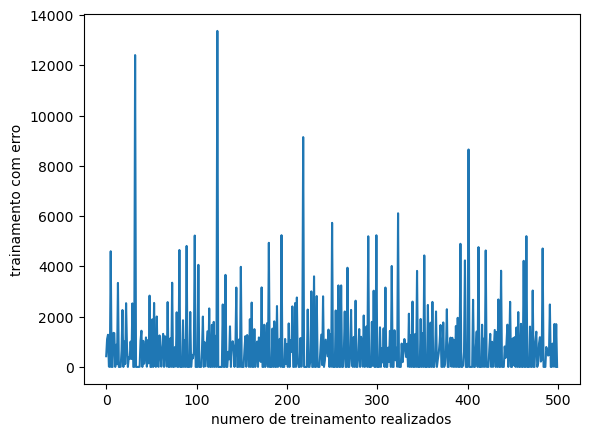

In [64]:
plt.plot(treinamentoHistorico.history['loss'])
plt.xlabel('numero de treinamento realizados')
plt.ylabel('trainamento com erro')

In [62]:
model.get_weights()
#os dois parametros localizados

[array([[1.7999963]], dtype=float32), array([32.00458], dtype=float32)]

In [63]:
#teste
temp_c = 0 
temp_f = model.predict(np.array([[temp_c]]))
temp_f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[32.00458]], dtype=float32)